In [1]:
import pandas as pd
df = pd.read_csv('BankFAQs.csv') #1st database
df.head()

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1773 non-null   object
 1   Answer    1773 non-null   object
 2   Class     1773 non-null   object
dtypes: object(3)
memory usage: 41.7+ KB


In [3]:
df.isnull().sum() #o null values 

Question    0
Answer      0
Class       0
dtype: int64

In [4]:
#2nd DATASET
import pandas as pd 
df2 = pd.read_csv('BankFAQs 2.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1764 non-null   object
 1   Answer    1764 non-null   object
 2   Class     1764 non-null   object
dtypes: object(3)
memory usage: 41.5+ KB


In [5]:
df2.isnull().sum()

Question    0
Answer      0
Class       0
dtype: int64

In [6]:
# MERGING TWO DIFFERENT DATASETS

df1 = pd.read_csv('BankFAQs.csv')
df2 = pd.read_csv('BankFAQs 2.csv')

# Merge the two DataFrames using the concat() function
merged_df = pd.concat([df1, df2])

# Save the merged DataFrame as a new CSV file
merged_df.to_csv('merged_file.csv', index=False)

df3 = pd.read_csv('merged_file.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  3537 non-null   object
 1   Answer    3537 non-null   object
 2   Class     3537 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [7]:
# CLEANING OF THE DATA 

# Drop columns with missing values
df3 = df3.dropna(axis=1)

# Remove duplicate rows
df3 = df3.drop_duplicates()

# Replace missing values with a default value
df3 = df3.fillna('Unknown')

# Remove leading/trailing whitespace from all string columns
df3 = df3.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 3535
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  2026 non-null   object
 1   Answer    2026 non-null   object
 2   Class     2026 non-null   object
dtypes: object(3)
memory usage: 63.3+ KB


In [8]:
!pip install wordcloud

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

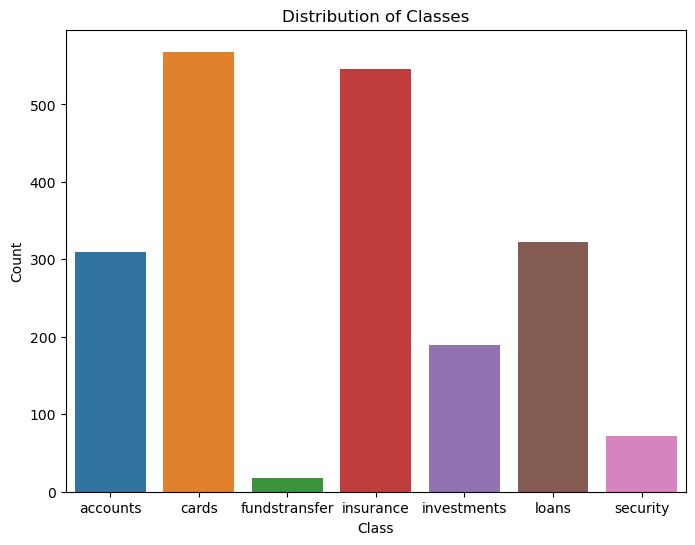

In [10]:
# Create a bar chart of the Class column
plt.figure(figsize=(8,6))
sns.countplot(data=df3, x='Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

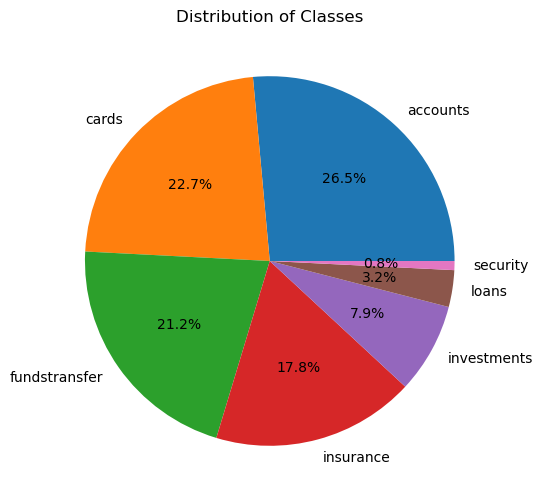

In [11]:
# Create a pie chart of the Class column
plt.figure(figsize=(8,6))
plt.pie(df['Class'].value_counts(), labels=df3['Class'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.show()

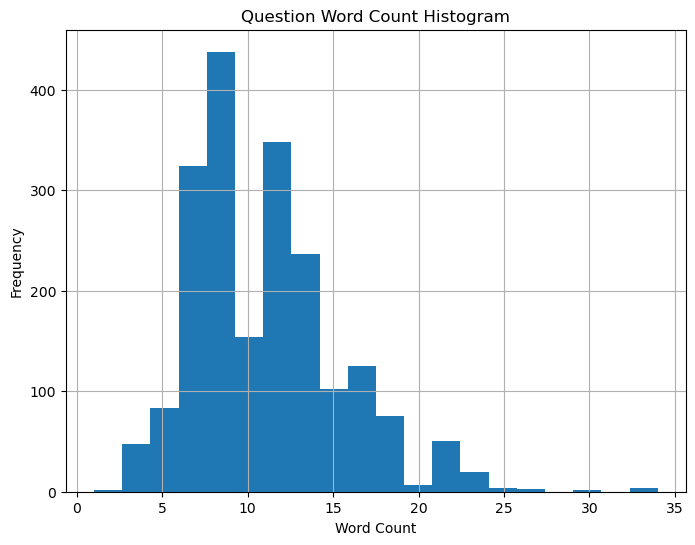

In [12]:
# Create a histogram of the Question column word count
plt.figure(figsize=(8,6))
df3['Question'].str.split().apply(len).hist(bins=20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Question Word Count Histogram')
plt.show()

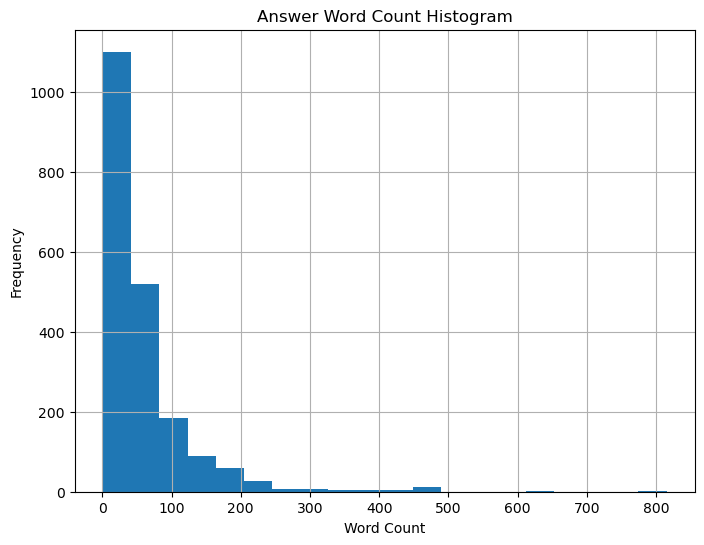

In [13]:
# Create a histogram of the Answer column word count
plt.figure(figsize=(8,6))
df3['Answer'].str.split().apply(len).hist(bins=20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Answer Word Count Histogram')
plt.show()


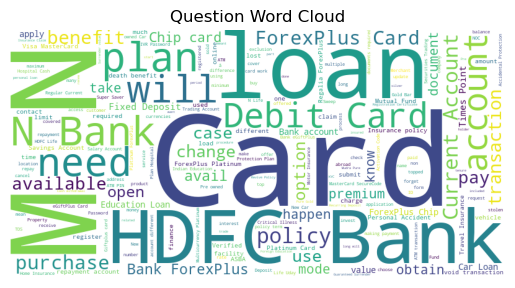

In [14]:
# Create a word cloud of the questions
question_text = ' '.join(df3['Question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Question Word Cloud')
plt.show()

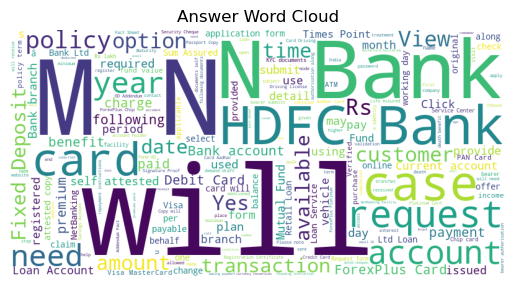

In [15]:
# Create a word cloud of the answers
answer_text = ' '.join(df3['Answer'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(answer_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Answer Word Cloud')
plt.show()

#4th task - feature engineering

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import string

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
df3 = pd.read_csv('merged_file.csv')

In [19]:
#Text Cleaning
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word.casefold() not in stop_words]
# Join Clean Words
    text = " ".join(words)
    return text

In [20]:
#Clean the 'Question' and 'Answer' Columns
df3['Question'] = df3['Question'].apply(clean_text)
df3['Answer'] = df3['Answer'].apply(clean_text)

In [21]:
#Text Representation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df3['Question'])
y = df3['Class']

In [22]:
#Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [23]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

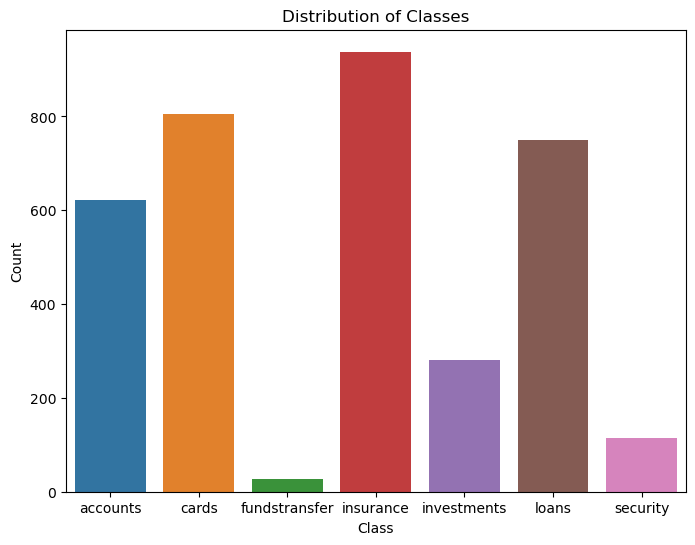

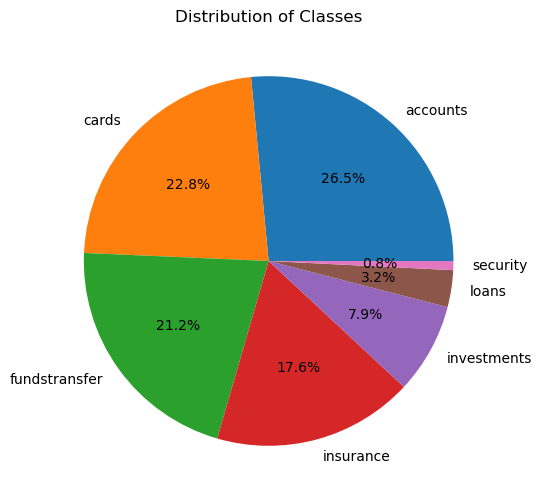

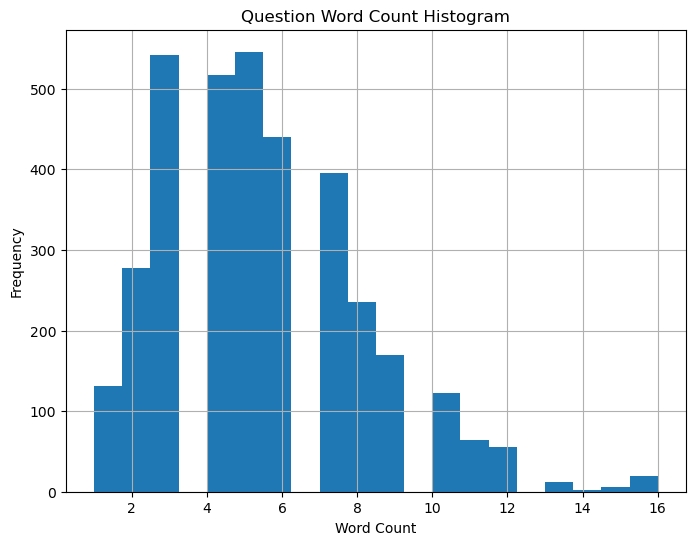

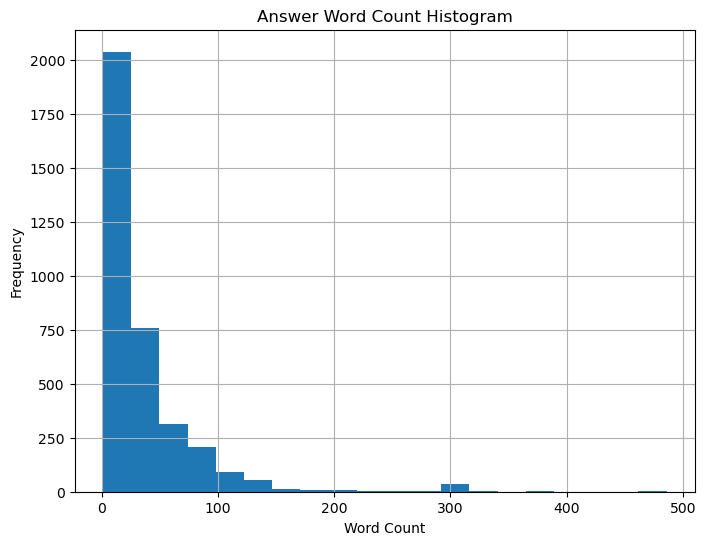

In [24]:
#Visualizations
plt.figure(figsize=(8,6))
sns.countplot(data=df3, x='Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

plt.figure(figsize=(8,6))
plt.pie(df3['Class'].value_counts(), labels=df3['Class'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.show()

plt.figure(figsize=(8,6))
df3['Question'].str.split().apply(len).hist(bins=20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Question Word Count Histogram')
plt.show()

plt.figure(figsize=(8,6))
df3['Answer'].str.split().apply(len).hist(bins=20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Answer Word Count Histogram')
plt.show()

In [1]:
#PRIDICTIVE MODEL

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import string
import nltk

nltk.download('stopwords')

df3 = pd.read_csv('merged_file.csv')

# Text Cleaning
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word.casefold() not in stop_words]
    # Join Clean Words
    text = " ".join(words)
    return text

# Clean the 'Question' and 'Answer' Columns
df3['Question'] = df3['Question'].apply(clean_text)
df3['Answer'] = df3['Answer'].apply(clean_text)

# Text Representation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df3['Question'])
y = df3['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 96.05%
Precision: 97.11%
Recall: 85.67%
F1 Score: 88.15%


In [5]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Create a list of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', MultinomialNB()),
    ('SVM', SVC())
]

# Evaluate each model using 5-fold cross-validation
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Select the best model
best_model_idx = np.argmax([np.mean(r) for r in results])
best_model = models[best_model_idx][1]
print("Best Model: ", models[best_model_idx][0])

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Analyze misclassified instances
misclassified = X_test[y_pred != y_test]
misclassified_questions = df3['Question'].iloc[misclassified.indices]
misclassified_answers = df3['Answer'].iloc[misclassified.indices]
correct_labels = y_test[y_pred != y_test]

# Print misclassified instances and correct labels
for i in range(len(misclassified_questions)):
    print("Question: ", misclassified_questions.iloc[i])
    print("Answer: ", misclassified_answers.iloc[i])
    if i < len(correct_labels):
        print("Correct Label: ", correct_labels.iloc[i])



Logistic Regression: 0.871529 (0.029983)
Naive Bayes: 0.726405 (0.015164)
SVM: 0.932254 (0.030881)
Best Model:  SVM
Question:  documents required opening Current Account partnership firm
Answer:  Following documents required opening Current Account partnership firm Latest Partnership Deed Documents establishing proof existence Certificate Registration StatuteAct professional bodies Registration Certificate issued Registrar Firms Valid Business License Certificate Registration issued StateCentral Government authority validity would include grace period renewal mentioned certificate PAN Card name firm Selfsigned cheque issued firmâ€™s account PSUprivate sectorforeign bank along bank statement older four months Documents establishing proof address Landline telephone billelectricity bill public approved private operators State Bills older 4 months date account opening Property Ownership Deed ie title deeds property name firm duly stamped registered Latest property tax water tax paid receip

In [7]:
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN # use noun as default
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(nltk.pos_tag([word])[0][1])) for word in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...


In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...


True

In [2]:
# Ask user for input questions
while True:
    question = input("Enter a question or type 'quit' to exit: ")
    if question == 'quit':
        break
    
    # Preprocess the question
    question_vector = preprocess_text(question)
    
    # Use the trained model to predict the category
    category = best_model.predict(question_vector.reshape(1, -1))[0]
    
    # Get the answer for the predicted category
    answer = df3[df3['Category'] == category]['Answer'].values[0]
    
    print("Answer: ", answer)

Enter a question or type 'quit' to exit: QUIT


NameError: name 'preprocess_text' is not defined

In [2]:
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics.pairwise import cosine_similarity

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def cleanup(sentence):
    word_tok = nltk.word_tokenize(sentence)
    stemmed_words = [w for w in word_tok if not w in stop_words]
    return ' '.join(stemmed_words)

le = LE()
tfv = TfidfVectorizer(min_df=1, stop_words='english')

df3 = pd.read_csv("merged_file.csv")
questions = df3['Question'].values

X = []
for question in questions:
    X.append(cleanup(question))

tfv.fit(X)
le.fit(df3['Class'])
X = tfv.transform(X)
y = le.transform(df3['Class'])

trainx, testx, trainy, testy = tts(X, y, test_size=.3, random_state=42)
model = SVC(kernel='linear')
model.fit(trainx, trainy)

class_=le.inverse_transform(model.predict(X))

def get_max5(arr):
    ixarr = []
    for ix, el in enumerate(arr):
        ixarr.append((el, ix))

    ixarr.sort()

    ixs = []
    for i in ixarr[-5:]:
        ixs.append(i[1])

    return ixs[::-1]

def get_response(usrText):
    while True:
        if usrText.lower() == "bye":
            return "Bye"

        GREETING_INPUTS = ["hello", "hi", "greetings", "sup", "what's up", "hey","hiii","hii","yo"]
        a = [x.lower() for x in GREETING_INPUTS]

        sd=["Thanks","Welcome"]
        d = [x.lower() for x in sd]

        am=["OK"]
        c = [x.lower() for x in am]

        t_usr = tfv.transform([cleanup(usrText.strip().lower())])
        class_ = le.inverse_transform(model.predict(t_usr))

        questionset = df3[df3['Class'].values == class_]

        cos_sims = []
        for question in questionset['Question']:
            sims = cosine_similarity(tfv.transform([question]), t_usr)
            cos_sims.append(sims)

        ind = cos_sims.index(max(cos_sims))
        b = [questionset.index[ind]]

        if usrText.lower() in a:
            return "Hi, I'm your BankingBuddy! How can I help you?"

        if usrText.lower() in c:
            return "Ok...Alright!"

        if usrText.lower() in d:
            return "My pleasure!"

        if max(cos_sims) > 0.0:
            return df3['Answer'][questionset.index[ind]] + " "

        elif max(cos_sims) == 0.0:
            return "Sorry, I'm not sure I understand. Can you please rephrase your question?"

print("Hi, I'm your BankingBuddy! How can I help you?")

while True:
    user_input = input()
    response = get_response(user_input)

    if response == "Bye":
        print("Bye!")
        break

    print(response)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hi, I'm your BankingBuddy! How can I help you?
TELL ME ABOUT THE LOAN PROCEDURE 
The amount of the loan you can get depends on: The cost of the vehicle The type of vehicle (standard/premium) The percentage of finance offered 
HOW CAN I LOVE YOU 
Sorry, I'm not sure I understand. Can you please rephrase your question?
HOW CAN I HAVE A BABY WITH YOU 
Sorry, I'm not sure I understand. Can you please rephrase your question?
bye
Bye!


In [3]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\upshi\anaconda3\lib\site-packages (1.21.0)



In [4]:
#!/usr/bin/env python
# coding: utf-8
# In[4]:



import streamlit as st
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics.pairwise import cosine_similarity

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def cleanup(sentence):
    word_tok = nltk.word_tokenize(sentence)
    stemmed_words = [w for w in word_tok if not w in stop_words]
    return ' '.join(stemmed_words)

le = LE()
tfv = TfidfVectorizer(min_df=1, stop_words='english')

df3 = pd.read_csv("merged_file.csv")
questions = df3['Question'].values

X = []
for question in questions:
    X.append(cleanup(question))

tfv.fit(X)
le.fit(df3['Class'])
X = tfv.transform(X)
y = le.transform(df3['Class'])

trainx, testx, trainy, testy = tts(X, y, test_size=.3, random_state=42)
model = SVC(kernel='linear')
model.fit(trainx, trainy)

class_=le.inverse_transform(model.predict(X))

def get_max5(arr):
    ixarr = []
    for ix, el in enumerate(arr):
        ixarr.append((el, ix))

    ixarr.sort()

    ixs = []
    for i in ixarr[-5:]:
        ixs.append(i[1])

    return ixs[::-1]

def get_response(usrText):
    while True:
        if usrText.lower() == "bye":
            return "Bye"

        GREETING_INPUTS = ["hello", "hi", "greetings", "sup", "what's up", "hey","hiii","hii","yo"]
        a = [x.lower() for x in GREETING_INPUTS]

        sd=["Thanks","Welcome"]
        d = [x.lower() for x in sd]

        am=["OK"]
        c = [x.lower() for x in am]

        t_usr = tfv.transform([cleanup(usrText.strip().lower())])
        class_ = le.inverse_transform(model.predict(t_usr))

        questionset = df3[df3['Class'].values == class_]

        cos_sims = []
        for question in questionset['Question']:
            sims = cosine_similarity(tfv.transform([question]), t_usr)
            cos_sims.append(sims)

        ind = cos_sims.index(max(cos_sims))
        b = [questionset.index[ind]]

        if usrText.lower() in a:
            return "Hi, I'm your BankingBuddy! How can I help you?"

        if usrText.lower() in c:
            return "Ok...Alright!"

        if usrText.lower() in d:
            return "My pleasure!"

        if max(cos_sims) > 0.0:
            return df3['Answer'][questionset.index[ind]] + " "

        elif max(cos_sims) == 0.0:
            return "Sorry, I'm not sure I understand. Can you please rephrase your question?"

st.title("BankingBuddy Chatbot")

st.write("Hi, I'm your BankingBuddy! How can I help you?")

user_input = st.text_input("You: ")

if user_input:
    response = get_response(user_input)

if response == "Bye":
    st.write("BankingBuddy: Goodbye! Have a nice day.")
else:
    st.write("BankingBuddy:", response)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\upshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-11 14:35:59.530 
  command:

    streamlit run C:\Users\upshi\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
